# **Load Data**

In [10]:
from nilearn import datasets as ni_data
import pandas as pd

In [5]:
def create_file_list(subs, emotions, primings):
    '''
    purpose: create lists for file names, specified subjects, emotion states and priming conditions
    
    parameters:
        subs: list: subject numbers
        emotions: list: emotion states (anger, fear, disgust)
        priming: list: of priming conditions (congruent,, incongruent, neutral)
    
    output: 
        files (list): list of file names
        subject_no (list): list of subject numbers matching the order of the file names
        emotion_class (list): list of emotion states matching the order of the file names
        priming_class (list): list of priming conditions matching the order of the file names
        
    '''

    # intialize vars
    files = []
    subject_no = []
    emotion_class = []
    priming_class = []

    # iterate over the different classes
    for sub in subs:
        for emo in emotions: 
            for priming in primings:
    
                # get the subject as a string
                if sub // 10 == 0:
                    sub_str = '00' + str(sub)
                else:
                    sub_str = '0' + str(sub)
                
                # create the filename and add to list
                filename = './emotion-fmri-neu/cp' + sub_str + '_beta_' + emo + '_' + priming + '_c0.nii.gz'
                files.append(filename)
                subject_no.append(sub)
                emotion_class.append(emo)
                priming_class.append(priming)

    return files, subject_no, emotion_class, priming_class

In [6]:
def create_dataset(files):
    '''
    purpose: generate dataset of image_da tuple of file names, specified subjects, emotion states and priming conditions
    
    parameters:
        none
    
    output: 
        image_data: np.array: 4D array of voxel brain data for 270 test subjects
    '''

    # convert image data to NumPy array
    image_list = []

    for f in files:
        img = nib.load(f)
        data = img.get_fdata()
        image_list.append(data)

    # stack all into one 4D array: (270, 91, 109, 91)
    image_data = np.stack(image_list)

    return image_data

In [7]:
# create lists for classes and filenames
subjects = range(1,31)
emotions = ['anger', 'fear', 'disgust']
primings = ['congruent', 'incongruent', 'neutral']
files, subject_no, emotion_class, priming_class = create_file_list(subjects, emotions, primings)

# load raw data as numpy arrays
image_data  = create_dataset(files)

# output dimension to understand underlying data structure
image_data.shape

(270, 91, 109, 91)

## **Create Directories to Load Future Data Into**

In [232]:
directories = [ 'data', 
                   './data/parcellations', 
                   './data/collinearity',
                   './data/two_dimensions',
                   './data/cost_function_logs',
                   './data/dimension_reductions',
                   './data/interpretation',
                   './data/results',
                          './data/results/classification_reports',
                          './data/results/coefficients',
                          './data/results/errors',
                         './data/results/matrices',
                         './data/results/errors',
                           
               'visualizations', 
                   './visualizations/cost_functions', 
                   './visualizations/collinearity',
                   './visualizations/confusion_matrices',
                   './visualizations/atlas_maps', 
                   './visualizations/heteroscedasticity', 
                   './visualizations/two_dimensions',
              ]

for dir_name in directories:
    try:
        os.mkdir(dir_name)
        print(f"Directory '{dir_name}' created successfully.")
    except FileExistsError:
        print(f"Directory '{dir_name}' already exists.")
    except PermissionError:
        print(f"Permission denied: Unable to create '{dir_name}'.")
    except Exception as e:
        print(f"An error occurred: {e}")

Directory 'data' already exists.
Directory './data/parcellations' already exists.
Directory './data/collinearity' already exists.
Directory './data/two_dimensions' already exists.
Directory './data/cost_function_logs' already exists.
Directory './data/dimension_reductions' already exists.
Directory 'visualizations' already exists.
Directory './visualizations/cost_functions' already exists.
Directory './visualizations/collinearity' already exists.
Directory './visualizations/atlas_maps' already exists.
Directory './visualizations/heteroscedasticity' already exists.
Directory './visualizations/two-dimensions' already exists.


In [7]:
def parcellation_atlas_dict():
    
    '''
    purpose: create a dictionaries for all parcellation techniques with their respective maps and labels
    parameters: none
    output: 
        tuple: 
            maps: dict: brain parcellation atlas maps in the NiLearn dataset  
            regions: dict: brain regions correlated to each map  
    '''

    # Harvard Oxford Atlases
    harvard_oxford_cort_0_1 = ni_data.fetch_atlas_harvard_oxford('cort-maxprob-thr0-1mm')
    harvard_oxford_cortl_0_1 = ni_data.fetch_atlas_harvard_oxford('cortl-maxprob-thr0-1mm')
    harvard_oxford_sub_0_1 = ni_data.fetch_atlas_harvard_oxford('sub-maxprob-thr0-1mm')

    # Juelich Atlas
    juelich_0_1 = ni_data.fetch_atlas_juelich('maxprob-thr0-1mm')

    # AAL templates
    aal_spm12 = ni_data.fetch_atlas_aal('SPM12')

    # Talairach atlases
    talairach_hemi = ni_data.fetch_atlas_talairach('hemisphere')
    talairach_lobe = ni_data.fetch_atlas_talairach('lobe')
    talairach_gyrus = ni_data.fetch_atlas_talairach('gyrus')
    talairach_tissue = ni_data.fetch_atlas_talairach('tissue')
    talairach_ba = ni_data.fetch_atlas_talairach('ba')

    # Schaefer 2018 atlas
    schaefer_100_7_1 = ni_data.fetch_atlas_schaefer_2018(n_rois=100, yeo_networks=7, resolution_mm=1)

    maps = {
              'Harvard_Oxford cort 0 x 1': harvard_oxford_cort_0_1.maps, 'Harvard_Oxford cortl 0 x 1': harvard_oxford_cortl_0_1.maps,
              'Harvard_Oxford sub 0 x 1': harvard_oxford_sub_0_1.maps, 'Juelich 0 x 1' : juelich_0_1.maps, 'AAL SPM12' : aal_spm12.maps,
               'Talairach Hemi' : talairach_hemi.maps, 'Talairach Lobe' : talairach_lobe.maps, 'Talairach Gyrus' : talairach_gyrus.maps,
               'Talairach Tissue' : talairach_tissue.maps, 'Talairach Ba' : talairach_ba.maps,
              'Schaefer 100 x 7 x 1' : schaefer_100_7_1.maps,
            }


    regions = {
              'Harvard_Oxford cort 0 x 1': harvard_oxford_cort_0_1.labels, 'Harvard_Oxford cortl 0 x 1': harvard_oxford_cortl_0_1.labels,
              'Harvard_Oxford sub 0 x 1': harvard_oxford_sub_0_1.labels, 'Juelich 0 x 1' : juelich_0_1.labels, 'AAL SPM12' : aal_spm12.labels,
               'Talairach Hemi' : talairach_hemi.labels, 'Talairach Lobe' : talairach_lobe.labels, 'Talairach Gyrus' : talairach_gyrus.labels,
               'Talairach Tissue' : talairach_tissue.labels, 'Talairach Ba' : talairach_ba.labels,
              'Schaefer 100 x 7 x 1' : schaefer_100_7_1.labels,
            }

    return maps, regions


In [10]:
def parcellized_brain_vecs(brain_imgs, parc_map, atlas):
    '''
    purpose: transform each .nii.gz image into a 1D vector using brain parcellation techniques
    
    params:
        brain_img: list: filenames for fMRI data
        parc_map : dict: dictionary of parcellation atlas maps
        atlas : str: name of brain parcellation technique

    
    output: np.array: transformed data based on input parcellation technique
    '''
    
    masker = input_data.NiftiLabelsMasker(labels_img=parc_map[atlas])
    features = masker.fit_transform(brain_imgs)
    
    return features

In [8]:
# create datasets for each brain parcellation
maps, regions = parcellation_atlas_dict()

In [12]:
# save data as csv files to decrease loading time when kernel dies
for key in maps.keys():
    data = parcellized_brain_vecs(files, maps, key)
    if (key == 'AAL SPM12') or (key == 'Schaefer 100 x 7 x 1'):
        names = regions[key]
    else:
        names = regions[key][1:]
    df = pd.DataFrame(data, columns=names)
    df['filename'] = files
    df['subject'] = subject_no
    df['emotion'] = emotion_class
    df['priming'] = priming_class
    df.to_csv(f'./data/parcellations/{key}.csv', index=False)

In [13]:
# reshape and scale data from 4D to 2D to simplify dim redux operations
X = StandardScaler().fit_transform(image_data.reshape(270, -1))
X.shape

(270, 902629)

### **Principal Component Analysis**

In [ ]:
# fit PCA model
pca = PCA()
X_test_pca = pca.fit_transform(X)

# get cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(9, 6))
plt.plot(cumulative_variance)
plt.axhline(y=0.99, color='r', linestyle='--')

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance vs. Components')


plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.savefig("./visualizations/cost_functions/PCA.png")
plt.close()

# find the number of components that reach 99% variance
n_components_99 = np.argmax(cumulative_variance >= 0.99) + 1
print(f"Number of components to explain 99% of variance: {n_components_99}")

In [44]:
# PCA dim reduction with 226 components
pca_dim_redux = PCA(n_components=226)
X_pca = pca_dim_redux.fit_transform(X)

## **Stress Functions and Reconstruction Errors**

In [30]:
def plot_cost_function_per_component(model, input_data, max_dims=269):

    # initialize
    errors = {}
    log_file = f"./data/cost_function_logs/{model}.txt"

    with open(log_file, "w") as log:

        # iterate over every 5 for speed
        for d in range(1, max_dims, 5):

            # track the number of components
            log.write(f"Round: {d}\n")
            
            try:
                if model == 'sammon':
                    output, E = sammon_mapping(input_data, d)
                    errors[d] = E
                elif model == 'isomap':
                    isomap = Isomap(n_components=d, n_neighbors=10)
                    X_iso = isomap.fit_transform(input_data)
                    E = isomap.reconstruction_error()
                    errors[d] = E
                elif model == 'mlle':
                    embedding = LocallyLinearEmbedding(n_components=d, method='modified', n_neighbors=d * 2)
                    X_transformed = embedding.fit_transform(input_data)
                    E = embedding.reconstruction_error_
                    errors[d] = E
                elif model == 'hessian':
                    embedding = LocallyLinearEmbedding(n_components=d, method='hessian', n_neighbors=int(d * (d + 4) / 2))
                    X_transformed = embedding.fit_transform(input_data)
                    E = embedding.reconstruction_error_
                    errors[d] = E
                elif model == 'mds':
                    mds = MDS(n_components=d, dissimilarity='euclidean', normalized_stress='auto')
                    X_mapped = mds.fit_transform(input_data)
                    E = mds.stress_
                    errors[d] = E

                log.write(f"Components: {d}, Error: {E}\n\n")

            # store errors and the number of components
            except ValueError as e:
                log.write(f"Skipped d={d}: {e}\n\n")
                continue

    # plot the cost function
    plt.figure(figsize=(15, 6))
    keys = list(errors.keys())
    vals = list(errors.values())
    plt.plot(keys, vals)

    plt.xlabel('Number of components')
    plt.ylabel('Error')
    plt.title(f'Cost Function vs. Components ({model})')

    plt.tight_layout()
    plt.xticks(range(min(keys), max(keys) + 1, 5), rotation=45)
    plt.grid(True, alpha=0.3)
    plt.savefig(f"./visualizations/cost_functions/{model}.png")
    plt.close()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


### **Sammon Mapping**

The runtime for sammon mapping was taking long and kept crashing my kernel so I decided to leave it out of the analysis.

In [15]:
def sammon_mapping(x, n = 2, display = 0, inputdist = 'raw', maxhalves = 20, maxiter = 500, tolfun = 1e-9, init = 'pca'):
    '''from open source contirbutor: https://pypi.org/project/sammon-mapping'''
    
    X = x

    # Create distance matrix unless given by parameters
    if inputdist == 'distance':
        xD = X
    else:
        xD = cdist(X, X)

    # Remaining initialisation
    N = X.shape[0] # hmmm, shape[1]?
    scale = 0.5 / xD.sum()

    if init == 'pca':
        [UU,DD,_] = np.linalg.svd(X)
        Y = UU[:,:n]*DD[:n] 
    else:
        Y = np.random.normal(0.0,1.0,[N,n])
    one = np.ones([N,n])

    xD = xD + np.eye(N)        
    xDinv = 1 / xD # Returns inf where D = 0.
    xDinv[np.isinf(xDinv)] = 0 # Fix by replacing inf with 0 (default Matlab behaviour).    
    yD = cdist(Y, Y) + np.eye(N)
    yDinv = 1. / yD # Returns inf where d = 0. 
    
    np.fill_diagonal(xD, 1)    
    np.fill_diagonal(yD, 1)
    np.fill_diagonal(xDinv, 0)
    np.fill_diagonal(yDinv, 0)
    
    xDinv[np.isnan(xDinv)] = 0
    yDinv[np.isnan(xDinv)] = 0
    xDinv[np.isinf(xDinv)] = 0    
    yDinv[np.isinf(yDinv)] = 0 # Fix by replacing inf with 0 (default Matlab behaviour).
    
    delta = xD - yD 
    E = ((delta**2)*xDinv).sum() 

    # Get on with it
    for i in range(maxiter):

        # Compute gradient, Hessian and search direction (note it is actually
        # 1/4 of the gradient and Hessian, but the step size is just the ratio
        # of the gradient and the diagonal of the Hessian so it doesn't
        # matter).
        delta = yDinv - xDinv
        deltaone = np.dot(delta,one)
        g = np.dot(delta, Y) - (Y * deltaone)
        dinv3 = yDinv ** 3
        y2 = Y ** 2
        H = np.dot(dinv3,y2) - deltaone - np.dot(2, Y) * np.dot(dinv3, Y) + y2 * np.dot(dinv3,one)
        s = -g.flatten(order='F') / np.abs(H.flatten(order='F'))
        y_old = Y

        # Use step-halving procedure to ensure progress is made
        for j in range(maxhalves):
            s_reshape = s.reshape(2,round(len(s)/2)).T
            y = y_old + s_reshape
            d = cdist(y, y) + np.eye(N)
            dinv = 1 / d # Returns inf where D = 0. 
            dinv[np.isinf(dinv)] = 0 # Fix by replacing inf with 0 (default Matlab behaviour).
            delta = xD - d
            E_new = ((delta**2)*xDinv).sum()
            if E_new < E:
                break
            else:
                s = np.dot(0.5,s)

        # Bomb out if too many halving steps are required
        if j == maxhalves:
            print('Warning: maxhalves exceeded. Sammon mapping may not converge...')

        # Evaluate termination criterion
        if np.abs((E - E_new) / E) < tolfun:
            if display:
                print('TolFun exceeded: Optimisation terminated')
            break

        # Report progress
        E = E_new
        if display > 1:
            print('epoch = ' + str(i) + ': E = ' + str(E * scale))

    # Fiddle stress to match te original Sammon paper
    E = E * scale
    
    return y,E

### **Isomap**

For isomap we can use reconstruction error, the cost function which can help us see when there is no longer a dramatic decreases in error as we increase component count. to 

In [31]:
plot_cost_function_per_component('isomap', X)

In [32]:
# Isomap dim reduction with 51 components
isomap_dim_redux = Isomap(n_components=51, n_neighbors=45)
X_isomap = isomap_dim_redux.fit_transform(X)

### **Modified Locally Linear Embedding**

The runtime for sammon mapping was taking long and kept crashing my kernel so I decided to leave it out of the analysis.

### **t-SNE**

t-SNE cannot expand beyond more than 3 dimensions so that is the maximum set here. 

In [33]:
X_tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(X)

### **Autoencoders**

The runtime for sammon mapping was taking long and kept crashing my kernel so I decided to leave it out of the analysis.

In [22]:
class Autoencoder(nn.Module):
    """Autoencoder implementation using PyTorch"""
    def __init__(self, input_dim, latent_dim=2):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 256),
            nn.ReLU(),
            nn.Linear(256, input_dim),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
    def encode(self, x):
        return self.encoder(x)

In [23]:
def train_autoencoder(X, input_dim, latent_dim=2, epochs=50, batch_size=128):
    """Train autoencoder and return latent representations"""
    model = Autoencoder(input_dim, latent_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    #Convert to PyTorch tensors
    X_tensor = torch.FloatTensor(X)
    dataset = torch.utils.data.TensorDataset(X_tensor, X_tensor)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    #Training loop
    for epoch in range(epochs):
        for batch_features, _ in dataloader:
            optimizer.zero_grad()
            outputs = model(batch_features)
            loss = criterion(outputs, batch_features)
            loss.backward()
            optimizer.step()
    
    #Get latent representations
    with torch.no_grad():
        latent = model.encode(X_tensor).numpy()
    
    return latent

### **Hessian Eigenmapping**

In [34]:
def quadratic_formula(a, b, c):
    return (-b + ((b**2 - 4*a*c) **0.5)) / 2*a

In [35]:
d = quadratic_formula(1, 3, -540)
int((d * (d + 3) / 2) + 1), d

(271, 21.786262044390035)

In [37]:
# Hessian Eigenmapping dim reduction with 21 components
hessian_dim_redux = LocallyLinearEmbedding(n_components=21, method='hessian', n_neighbors=269)
X_hessian= hessian_dim_redux.fit_transform(X)

### **Multi-dimesional Scaling**



In [38]:
plot_cost_function_per_component('mds', X)

In [39]:
# MDS dim reduction with 50 components
mds_dim_redux = MDS(n_components=50, dissimilarity='euclidean', normalized_stress='auto')
X_mds = mds_dim_redux.fit_transform(X)

## **Reduce Data Dimensions and Store New Datasets**

In [45]:
# create dictionary for datasets of each dimension reduction method
dimension_redux_dict = {'PCA': X_pca, 'Isomap': X_isomap, 'Hessian': X_hessian, 'MDS': X_mds, 't-SNE': X_tsne }

In [49]:
# save data as csv files to decrease loading time when kernel dies
for key in dim_redux_methods:
    data = dimension_redux_dict[key]
    names = [f'Feat {i+1}' for i in range(len(data.T))]
    df = pd.DataFrame(data, columns=names)
    df['filename'] = files
    df['subject'] = subject_no
    df['emotion'] = emotion_class
    df['priming'] = priming_class
    df.to_csv(f'./data/dimension_reductions/{key}.csv', index=False)

# **Exploratory Data Analysis**

## **Load New Datasets**

In [11]:
dim_redux_methods = ['PCA', 'Isomap', 'Hessian', 'MDS', 't-SNE']
brain_parcellations = {key: pd.read_csv(f'./data/parcellations/{key}.csv') for key in maps.keys()}
dimension_reductions = {key: pd.read_csv(f'./data/dimension_reductions/{key}.csv') for key in dim_redux_methods}

# make this 1 dataset instead of 3 due to the very low dimesnional input space: & + 3 + 12 = 22 features
brain_parcellations['Talairach Hemi x Lobe x Tissue'] = brain_parcellations['Talairach Hemi'].merge(
    brain_parcellations['Talairach Lobe'], how='outer', on=['subject', 'priming', 'filename', 'emotion']).merge(
    brain_parcellations['Talairach Tissue'], how='outer', on=['subject', 'priming', 'filename', 'emotion'])

brain_parcellations['Talairach Hemi x Lobe x Tissue'].to_csv('./data/parcellations/Talairach Hemi x Lobe x Tissue.csv', index=False)

brain_parce_methods = brain_parcellations.keys()

## **Check for Multicollinearity**

<h2 style="text-align: center" /><b>Correlation Matrices as Heatmaps<b></h2>

<div style="text-align: center">
    <img src="./visualizations/collinearity/Talairach Hemi x Lobe x Tissue.png" alt="image" width="800" />
</div>


In [110]:
# correlation matrices
def corr_matrix(dataset, data_dict):

    # Drop non-numeric or irrelevant columns
    columns_to_exclude = ['filename', 'emotion', 'priming']
    df = data_dict[dataset].drop(columns=columns_to_exclude, errors='ignore')
    
    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), cmap='seismic', vmin=-1, vmax=1)
    plt.title(f"Correlation Heatmap for {dataset} Data")
    plt.tight_layout()
    plt.savefig(f'./visualizations/collinearity/{dataset}.png')
    plt.close()

In [111]:
corr_matrix('Harvard_Oxford sub 0 x 1', brain_parcellations)
corr_matrix('Talairach Hemi x Lobe x Tissue', brain_parcellations)
corr_matrix('t-SNE', dimension_reductions)
corr_matrix('Hessian', dimension_reductions)

### **Variance Inflation Factor**

In [69]:
def calc_vif(X):
    
    # create VIF dataframe for covariates
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [vif(X.values, i) for i in range(len(X.columns))]
    vif_data = vif_data.sort_values(by=['VIF'], ascending=False)
    
    return vif_data

In [175]:
def del_multico(df, name, num):
    """
    purpose: removes multicollinear features from df based on VIF.

    params:
        df: pd.DataFrame: feature variables
        num: int : number of features to remove.

    output: 
        tuple:
            vif_df: pd.DataFrame: selected features after removing high VIF features
            perc_multico: float: percentages of features that were removed for high VIF values
    """

    # select only float64 and int64 columns
    new_X = df.select_dtypes(include=['float64', 'int64']).copy()
    

    while True:

        # calculate VIF and check if below threshold
        vif_df = calc_vif(new_X)  
        if vif_df["VIF"].max() <= num:
            break 

        # find feature with the highest VIF and drop it
        feature_to_remove = vif_df.iloc[0]["feature"]
        new_X = new_X.drop(columns=[feature_to_remove])
        

    # calculate % of features remove for collinearity
    ratio = len(vif_df) / (len(df.columns) - 3)
    percent = 100 - (ratio * 100)

    # save vif dataframe
    vif_df.to_csv(f'./data/collinearity/{name}_vif.csv', index=False)
    
    return percent

In [176]:
def plot_multicollinearity(data, name):
    '''
    purpose: visualize percentages of multicollineratiry in feature extraction methods
    params:
        data: dict: key, value pairs of dataset names and pd.DataFrames
        name: str: description of data subset
    output: none, plots and saves bar chart of % of multicollinearity based on VIF > 5
    '''

    # store values
    perc_multico = {}
    
    # for each dataset calculate % of the non-collinear features
    for key in data.keys():
        df = data[key]
        perc = del_multico(df, key, 5)
        perc_multico[key] = perc

        # visualize percentages of multicollineratiry in brain parcellation features
        keys = list(perc_multico.keys())
        vals = list(perc_multico.values())
        
    plt.figure(figsize=(12, 6))
    plt.barh(keys, vals, color='#c80909')
    
    plt.title('Percentage of Features Dropped to Make All VIF Values < 5')
    plt.xlabel('Percent')
    plt.ylabel('Parcellations')
    
    plt.tight_layout()
    plt.grid(True, alpha=0.3)
    plt.savefig(f'./visualizations/collinearity/{name}.png')
    plt.close()

In [ ]:
# identify which methods produce the most multicollinearity 
plot_multicollinearity(brain_parcellations, 'Brain Parcellations', 5)
plot_multicollinearity(dimension_reductions, 'Dimension Reductions', 5)

## **Brain Parcellation Visuals**

In [ ]:
def plot_parcellation_map(atlas, maps, cut_coords = (3,-30,13)):
    '''
    purpose: plot visualization to show the areas of the brain divivded in parcellation atlas
        
    params:
        atlas_name : str: Name of brain parcellation technique  
        atlas_types : dict: Dictionary of parcellation atlases and their maps and labels   
        cut_coords : tuple Coordinates for brain visualization
    
    output: none, displays visualization of brain data
    '''
    
    atlas_map = maps[atlas]
    
    if type(atlas_map) == tuple:
        atlas_map = atlas_map[0]
    
    if type(atlas_map) == str or list:
        dim = get_data(atlas_map).ndim
        
    else:
        dim = atlas_map.ndim
    
    if dim == 4:
        plotting.plot_prob_atlas(atlas_map, cut_coords = cut_coords, title = atlas, black_bg=True)
        plt.savefig(f'./visualizations/atlas_maps/{atlas}.png')
        plt.close()
        
    else:
        plotting.plot_roi(atlas_map, cut_coords=cut_coords, title = atlas, black_bg = True)
        plt.savefig(f'./visualizations/atlas_maps/{atlas}.png')
        plt.close()

In [178]:
def plot_parcellation_map(atlas, maps, cut_coords = (3,-30,13)):
    '''
    purpose: plot visualization to show the areas of the brain divivded in parcellation atlas
        
    params:
        atlas_name : str: Name of brain parcellation technique  
        atlas_types : dict: Dictionary of parcellation atlases and their maps and labels   
        cut_coords : tuple Coordinates for brain visualization
    
    output: none, displays visualization of brain data
    '''
    
    atlas_map = maps[atlas]
    
    if type(atlas_map) == tuple:
        atlas_map = atlas_map[0]
    
    if type(atlas_map) == str or list:
        dim = get_data(atlas_map).ndim
        
    else:
        dim = atlas_map.ndim
    
    if dim == 4:
        plotting.plot_prob_atlas(atlas_map, cut_coords = cut_coords, title = atlas, black_bg=True)
        plt.tight_layout()
        plt.savefig(f'./visualizations/atlas_maps/{atlas}.png')
        plt.close()
        
    else:
        plotting.plot_roi(atlas_map, cut_coords=cut_coords, title = atlas, black_bg = True)
        plt.tight_layout()
        plt.savefig(f'./visualizations/atlas_maps/{atlas}.png')
        plt.close()

In [224]:
# for each brain parcellation, generate the visual map
for k in maps.keys():
    plot_parcellation_map(k, maps)

## **Heterogeneity of Y Across X For First Components**

In [235]:
def plot_heterogeneity_of_var(data, name):

    emo_p_values = {}
    pri_p_values = {}
    
    for k in data.keys():

        # select only on input column
        df = data[k]
        input_col = df.columns[0]

        # get p values for each class comparison
        anger = df[df['emotion'] == 'anger'][input_col]
        disgust = df[df['emotion'] == 'disgust'][input_col]
        fear = df[df['emotion'] == 'fear'][input_col]

        con = df[df['priming'] == 'congruent'][input_col]
        incon = df[df['priming'] == 'incongruent'][input_col]
        neu = df[df['priming'] == 'neutral'][input_col]

        emo_stat, emo_p = stats.levene(anger, disgust, fear)
        pri_stat, pri_p = stats.levene(con, incon, neu)

        emo_p_values[k] = emo_p
        pri_p_values[k] = pri_p

        
        # create a new figure and axes for each plot
        plt.figure(figsize=(10, 6))
        
        # create the violin plot
        sns.violinplot(data=df, x="emotion", y=input_col, hue="priming", fill=False, palette='prism')
    
        # add the title and labels
        plt.title(f'Variance of {k} for {input_col} Over Emotion and Priming Classes')
        plt.xlabel('Emotion Class')
        plt.ylabel(f'{k} {input_col}')
        plt.tight_layout()

        # save visual to directory
        plt.savefig(f'./visualizations/heteroscedasticity/{k}_violin.png')
        plt.close()


    
    # get p values for all methods
    emo_keys = list(emo_p_values.keys())
    emo_vals = list(emo_p_values.values())

    pri_keys = list(pri_p_values.keys())
    pri_vals = list(pri_p_values.values())


    
    # plot p values for variance across emotion class
    plt.figure(figsize=(12, 6))
    plt.barh(emo_keys, emo_vals, color='#c80909')
    
    plt.title(f'P Values for {name} Methods from Levene Test for Emotion Classes')
    plt.xlabel('P Values')
    plt.ylabel(f'{name} Methods')
    
    plt.tight_layout()
    plt.grid(True, alpha=0.3)
    plt.savefig(f'./visualizations/heteroscedasticity/{name}_emo_levene.png')
    plt.close()


    
    # plot p values for variance across priming class
    plt.figure(figsize=(12, 6))
    plt.barh(pri_keys, pri_vals, color='#c80909')
    
    plt.title(f'P Values for {name} Methods from Levene Test for Priming Classes')
    plt.xlabel('P Values')
    plt.ylabel(f'{name} Methods')
    
    plt.tight_layout()
    plt.grid(True, alpha=0.3)
    plt.savefig(f'./visualizations/heteroscedasticity/{name}_pri_levene.png')
    plt.close()
    

In [236]:
# identify which methods produce the most heteroscedasticity 
plot_heterogeneity_of_var(brain_parcellations, 'Brain Parcellations')
plot_heterogeneity_of_var(dimension_reductions, 'Dimension Reductions')

## **Dimension Reduction Visuals**

look at linearly separability in 2D space

In [238]:
# 2D dimension reduction
X_pca_2D = PCA(n_components=2).fit_transform(X) 
X_tsne_2D = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X) 
X_isomap_2D = Isomap(n_components=2, n_neighbors=10).fit_transform(X) 
X_hessian_2D = LocallyLinearEmbedding(n_components=2, method='hessian', n_neighbors=262).fit_transform(X) 
X_mds_2D = MDS(n_components=2, dissimilarity='euclidean', normalized_stress='auto').fit_transform(X)

In [239]:
# create dictionary for datasets of each dimension reduction method
dimension_redux_2D = {'PCA': X_pca_2D, 'Isomap': X_isomap_2D, 'Hessian': X_hessian_2D, 'MDS': X_mds_2D, 't-SNE': X_tsne_2D}

# save data as csv files to decrease loading time when kernel dies
for key in dimension_redux_2D.keys():
    data = dimension_redux_2D[key]
    names = [f'Feat {i+1}' for i in range(len(data.T))]
    df = pd.DataFrame(data, columns=names)
    df['filename'] = files
    df['subject'] = subject_no
    df['emotion'] = emotion_class
    df['priming'] = priming_class
    df.to_csv(f'./data/two_dimensions/{key}.csv', index=False)
    

In [241]:
dimension_redux_2D = {key: pd.read_csv(f'./data/two_dimensions/{key}.csv') for key in dim_redux_methods}

In [242]:
# encode your categorical labels into numerical values
le_emotion = LabelEncoder()
le_subject = LabelEncoder()
le_priming = LabelEncoder()

# Fit and transform the categorical data
emotion_encoded = le_emotion.fit_transform(emotion_class) 
subject_encoded = le_subject.fit_transform(subject_no)
priming_encoded = le_priming.fit_transform(priming_class) 

In [250]:
def plot_embeddings(X_emb, y_encoded, title, filename=None, label_encoder=None):
    '''
    purpose: plot 2D embeddings with numerical labels
    params:
        X_emb: 2D array of embeddings
        y_encoded: 1D array of numerical labels (e.g., output of LabelEncoder)
        title: str, plot title
        filename: str, optional, name to save the plot
        label_encoder: sklearn.preprocessing.LabelEncoder, optional, to show original labels in colorbar
    output: none, shows plot and saves to directory
    '''

    plt.figure(figsize=(10, 8))

    num_classes = len(np.unique(y_encoded))
    

    base_cmap = colormaps.get_cmap('prism').resampled(num_classes)
    custom_cmap = ListedColormap([base_cmap(i) for i in range(num_classes)])

    X_emb = np.array(X_emb)
    scatter = plt.scatter(X_emb[:, 0], X_emb[:, 1], c=y_encoded, cmap=custom_cmap, alpha=0.6)
    
    cbar = plt.colorbar(scatter, ticks=np.unique(y_encoded), label='Class')
    cbar.ax.set_yticklabels(label_encoder.inverse_transform(np.unique(y_encoded)))

    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.savefig(f'./visualizations/two_dimensions/{filename}')
    plt.close()

In [252]:
# plot results
for key in dimension_redux_2D.keys():
    
    plot_embeddings(dimension_redux_2D[key], subject_encoded, f"{key} Visualization Separated by Subject No.",
                    f"{key}_subject.png", label_encoder=le_subject)

    plot_embeddings(dimension_redux_2D[key], emotion_encoded, f"{key} Visualization Separated by Emotion State.",
                    f"{key}_emotion.png", label_encoder=le_emotion)

    plot_embeddings(dimension_redux_2D[key], priming_encoded, f"{key} Visualization Separated by Priming Condition.",
                    f"{key}_priming.png", label_encoder=le_priming)

# **Model Development**

In [45]:
# join all feature extraction datasets into one dict and remove redundancy
extracted_features = {**dimension_reductions, **brain_parcellations}

del extracted_features['Talairach Hemi']
del extracted_features['Talairach Tissue']
del extracted_features['Talairach Lobe']

feat_ex_methods = extracted_features.keys()

In [87]:
class HierarchicalKFoldCV:

    def __init__(self, method, data_dict, hier_class, target_class, n_splits=5):
        self.data = data_dict[method]
        self.method = method
        self.hier_class = hier_class
        self.target_class = target_class
        self.n_splits = n_splits
        self.model = LogisticRegression(penalty='l2', dual=False, multi_class='multinomial',
                                        warm_start=True, max_iter=5000)

        # For storing across folds
        self.all_coefs = []
        self.misclassified_records = []

        # intialize output directories
        base_path = "./data/results"
        self.output_paths = {
            'confusions': f"{base_path}/confusion_matrices",
            'coefficients': f"{base_path}/coefficients",
            'classification_reports': f"{base_path}/classification_reports",
            'errors': f"{base_path}/errors",
            'metrics': f"{base_path}/metrics",
        }

    def _separate_input_target(self):
        X = self.data.select_dtypes(include=['float64', 'int64']).drop(columns=[self.target_class], errors='ignore')
        y = self.data[self.target_class]
        groups = self.data[self.hier_class]
        
        return X, y, groups

    def _save_model_weights(self, feature_names):
        avg_coef = np.mean(self.all_coefs, axis=0)
        classes = self.model.classes_

        if avg_coef.ndim == 1:
            avg_coef = avg_coef.reshape(1, -1)

        weights_df = pd.DataFrame(avg_coef, columns=feature_names)
        weights_df['class'] = classes
        weights_df = weights_df.set_index('class').transpose()
        weights_df.to_csv(f"{self.output_paths['coefficients']}/{self.method}_{self.target_class}.csv")

    def _compute_and_save_metrics(self, y_true, y_pred, dataset_type):

        try:
            proba = self.model.predict_proba(self.X_test if dataset_type == 'test' else self.X_train)
            roc_auc = roc_auc_score(y_true, proba, average='micro', multi_class='ovr')
        except:
            roc_auc = 0

        report = classification_report(y_true, y_pred, output_dict=True, zero_division=np.nan)
        report_df = pd.DataFrame(report).transpose()
        report_df.to_csv(f"{self.output_paths['classification_reports']}/{self.method}_{self.target_class}_{dataset_type}.csv")

        return roc_auc

    def _save_confusion_matrix(self, y_true, y_pred, dataset_type):

        plt.figure(figsize=(8, 6))
        
        labels = unique_labels(y_true, y_pred)
        cm = confusion_matrix(y_true, y_pred, labels=labels)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
       
        plt.title(f"{dataset_type.capitalize()} Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.savefig(f"{self.output_paths['confusions']}/{self.method}_{self.target_class}_{dataset_type}.png")
        plt.close()

    def _accumulate_misclassifications(self, X, y_true, y_pred):
        misclassified_mask = y_true != y_pred
        misclassified_indices = X.index[misclassified_mask]
    
        # full original rows
        misclassified = self.data.loc[misclassified_indices]
    
        # ensure Series alignment
        true_labels = y_true.loc[misclassified_indices].reset_index(drop=True)
        pred_labels = pd.Series(y_pred).iloc[misclassified_mask.values].reset_index(drop=True)
    
        misclassified_df = pd.concat([
            misclassified.reset_index(drop=True),
            true_labels.rename("true_label"),
            pred_labels.rename("predicted_label")
        ], axis=1)
    
        self.misclassified_records.append(misclassified_df)



    def _save_aggregated_misclassifications(self):
        if not self.misclassified_records:
            return
        all_misclassified = pd.concat(self.misclassified_records, ignore_index=True)
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=PerformanceWarning)
            deduped = all_misclassified.groupby(all_misclassified.columns.tolist()).size().reset_index(name='error_count')
        deduped.to_csv(f"{self.output_paths['errors']}/{self.method}_{self.target_class}.csv", index=False)

    
    def evaluate(self):
        X, y, groups = self._separate_input_target()
        gkf = GroupKFold(n_splits=self.n_splits)

        train_roc_auc = 0
        test_roc_auc = 0

        for fold, (train_idx, test_idx) in enumerate(gkf.split(X, y, groups=groups), start=1):
            self.X_train, self.X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            self.model.fit(self.X_train, y_train)
            self.all_coefs.append(self.model.coef_)

            y_pred_train = self.model.predict(self.X_train)
            y_pred_test = self.model.predict(self.X_test)

            train_roc_auc += self._compute_and_save_metrics(y_train, y_pred_train, "train")
            test_roc_auc += self._compute_and_save_metrics(y_test, y_pred_test, "test")


            self._save_confusion_matrix(y_train, y_pred_train, "train")
            self._save_confusion_matrix(y_test, y_pred_test, "test")

            self._accumulate_misclassifications(self.X_test.copy(), y_test, y_pred_test)

        # Save averaged results
        self._save_model_weights(feature_names=self.X_train.columns)
        self._save_aggregated_misclassifications()

        return train_roc_auc/self.n_splits , test_roc_auc/self.n_splits , self.method, self.target_class, self.X_train.shape[1]

In [88]:
roc_auc_dict = {'train': [], 'test': [], 'method': [], 'target': [], 'feature_count' : []}

for app in feat_ex_methods:
    
    # run model on all extracted feature methods
    tr_e, te_e, me_e, ta_e, fe_e = HierarchicalKFoldCV(method=app, data_dict=extracted_features, hier_class='subject', 
                                         target_class='emotion', n_splits=5).evaluate()
    tr_p, te_p, me_p, ta_p, fe_p = HierarchicalKFoldCV(method=app, data_dict=extracted_features, hier_class='subject', 
                                         target_class='priming', n_splits=5).evaluate()
    roc_auc_dict['train'].append(tr_e)
    roc_auc_dict['test'].append(te_e)
    roc_auc_dict['method'].append(me_e)
    roc_auc_dict['target'].append(ta_e)
    roc_auc_dict['feature_count'].append(fe_e)

    roc_auc_dict['train'].append(tr_p)
    roc_auc_dict['test'].append(te_p)
    roc_auc_dict['method'].append(me_p)
    roc_auc_dict['target'].append(ta_p)
    roc_auc_dict['feature_count'].append(fe_p)

pd.DataFrame(roc_auc_dict).to_csv('./data/results/metrics/roc_auc.csv', index=False)

/Users/anandafrancis/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Interpretation & Analysis**

### **Which features and regions of the brain were most important in prediction?**

In [23]:
# get directories to find and store data
input_dir = "./data/results/coefficients"
output_dir = "./data/interpretation"

def merge_all_coefs(label):
    dfs = []

    for method in feat_ex_methods:
        filename = f"{method}_{label}.csv"
        file_path = os.path.join(input_dir, filename)

        df = pd.read_csv(file_path)
        df = df.rename(columns={"Unnamed: 0": "feature"})
        df['method'] = [method] * len(df)
        dfs.append(df)

    # Vertical concat
    merged_df = pd.concat(dfs, axis=0, ignore_index=True)
    merged_df.to_csv(os.path.join(output_dir, f"coef_{label}.csv"), index=False)

# Run for both labels
merge_all_coefs("priming")
merge_all_coefs("emotion")

In [25]:
coef_emotion = pd.read_csv('./data/interpretation/coef_emotion.csv')
coef_priming = pd.read_csv('./data/interpretation/coef_priming.csv')                         

In [31]:
# top 5 features for anger
coef_emotion.sort_values(by='anger', key=lambda x: x.abs(), ascending=False).head()

,feature,anger,disgust,fear,method
834,b'7Networks_LH_Vis_3',1.017723,-0.755716,-0.262007,Schaefer 100 x 7 x 1
475,Left Lingual Gyrus,0.941997,-0.545473,-0.396524,Harvard_Oxford cortl 0 x 1
909,b'7Networks_RH_SalVentAttn_Med_2',0.930387,0.151800,-1.082188,Schaefer 100 x 7 x 1
765,Brodmann area 11,0.821616,-0.124987,-0.696629,Talairach Ba
730,Middle Frontal Gyrus,-0.780615,0.171521,0.609094,Talairach Gyrus


In [32]:
# top 5 features for fear
coef_emotion.sort_values(by='fear', key=lambda x: x.abs(), ascending=False).head()

,feature,anger,disgust,fear,method
909,b'7Networks_RH_SalVentAttn_Med_2',0.930387,0.151800,-1.082188,Schaefer 100 x 7 x 1
572,GM Visual cortex V2 BA18,0.072508,0.863997,-0.936504,Juelich 0 x 1
428,"Right Middle Temporal Gyrus, posterior division",-0.720644,-0.183947,0.904591,Harvard_Oxford cortl 0 x 1
664,Thalamus_R,0.379499,0.496745,-0.876245,AAL SPM12
496,Right Planum Temporale,-0.422436,-0.426059,0.848495,Harvard_Oxford cortl 0 x 1


In [33]:
# top 5 features for disgust
coef_emotion.sort_values(by='disgust', key=lambda x: x.abs(), ascending=False).head()

,feature,anger,disgust,fear,method
899,b'7Networks_RH_DorsAttn_Post_2',0.194446,-1.018296,0.823850,Schaefer 100 x 7 x 1
701,Vermis_9,0.446425,-0.873693,0.427269,AAL SPM12
658,Caudate_R,0.618286,-0.872611,0.254325,AAL SPM12
572,GM Visual cortex V2 BA18,0.072508,0.863997,-0.936504,Juelich 0 x 1
441,"Left Supramarginal Gyrus, anterior division",0.294496,-0.804079,0.509583,Harvard_Oxford cortl 0 x 1


In [34]:
# top 5 features for congruent
coef_priming.sort_values(by='congruent', key=lambda x: x.abs(), ascending=False).head()

,feature,congruent,incongruent,neutral,method
708,Middle Temporal Gyrus,-1.582044,-1.054314,2.636358,Talairach Gyrus
706,Inferior Temporal Gyrus,1.378892,-0.852678,-0.526214,Talairach Gyrus
285,Feat 7,1.268965,-0.413082,-0.855884,Hessian
282,Feat 4,-1.200010,0.726177,0.473833,Hessian
847,b'7Networks_LH_DorsAttn_Post_1',1.096441,-0.418349,-0.678092,Schaefer 100 x 7 x 1


In [35]:
# top 5 features for incongruent
coef_priming.sort_values(by='incongruent', key=lambda x: x.abs(), ascending=False).head()

,feature,congruent,incongruent,neutral,method
378,"Lateral Occipital Cortex, inferior division",0.393376,-1.368453,0.975078,Harvard_Oxford cort 0 x 1
672,Temporal_Mid_R,-0.258868,-1.276597,1.535465,AAL SPM12
943,Temporal Lobe,-0.047740,-1.170311,1.218051,Talairach Hemi x Lobe x Tissue
450,"Right Lateral Occipital Cortex, inferior division",0.455515,-1.108849,0.653333,Harvard_Oxford cortl 0 x 1
708,Middle Temporal Gyrus,-1.582044,-1.054314,2.636358,Talairach Gyrus


In [36]:
# top 5 features for neutral
coef_priming.sort_values(by='neutral', key=lambda x: x.abs(), ascending=False).head()

,feature,congruent,incongruent,neutral,method
708,Middle Temporal Gyrus,-1.582044,-1.054314,2.636358,Talairach Gyrus
368,"Middle Temporal Gyrus, temporooccipital part",-0.917409,-0.963345,1.880754,Harvard_Oxford cort 0 x 1
814,Brodmann area 39,-0.540413,-1.030165,1.570579,Talairach Ba
672,Temporal_Mid_R,-0.258868,-1.276597,1.535465,AAL SPM12
542,GM Inferior parietal lobule PGp,-0.898036,-0.343556,1.241591,Juelich 0 x 1


### **Can brain activation patterns predict emotion well? Which performed best overall?**
**Parcellation or Reduction? Priming or Emotion?**

In [89]:
roc_auc_scores = pd.read_csv('./data/results/metrics/roc_auc.csv')
roc_auc_scores.sort_values(by='test', ascending=False)

,train,test,method,target,feature_count
1,1.000000,0.873971,PCA,priming,227
25,1.000000,0.847599,Schaefer 100 x 7 x 1,priming,101
11,0.983766,0.846331,Harvard_Oxford cort 0 x 1,priming,49
13,0.999276,0.822222,Harvard_Oxford cortl 0 x 1,priming,97
5,0.859452,0.807064,Hessian,priming,22
17,0.991307,0.790947,Juelich 0 x 1,priming,63
23,0.997737,0.789678,Talairach Ba,priming,72
19,0.999989,0.789438,AAL SPM12,priming,117
21,0.991302,0.774143,Talairach Gyrus,priming,56
27,0.821073,0.704664,Talairach Hemi x Lobe x Tissue,priming,23


### **Overall which performed better? Parcellation techniques or dimensionality reduction techniques?**

In [63]:
# directories
input_dir = "./data/results/classification_reports"
output_file = "./data/interpretation/f1_scores.csv"

def merge_f1_scores(feat_ex_methods):
    rows = []

    for method in feat_ex_methods:
        row = {
            "method": method,
            "congruent": None,
            "incongruent": None,
            "neutral": None,
            "anger": None,
            "disgust": None,
            "fear": None
        }

        for label in ["priming", "emotion"]:
            filename = f"{method}_{label}_test.csv"
            file_path = os.path.join(input_dir, filename)

            if not os.path.exists(file_path):
                continue

            df = pd.read_csv(file_path)
            df = df.rename(columns={"Unnamed: 0": "class"})
            df = df.set_index("class")

            for target_class in row.keys():
                if target_class in df.index:
                    row[target_class] = df.loc[target_class, "f1-score"]

        rows.append(row)

    final_df = pd.DataFrame(rows)
    final_df.to_csv(output_file, index=False)


merge_f1_scores(feat_ex_methods)

In [64]:
f1_scores = pd.read_csv(output_file)

In [67]:
# top 5 for congruent
f1_scores.sort_values('congruent', ascending=False).head()

,method,congruent,incongruent,neutral,anger,disgust,fear
0,PCA,0.769231,0.769231,0.800000,0.333333,0.432432,0.439024
5,Harvard_Oxford cort 0 x 1,0.769231,0.764706,0.742857,0.425532,0.484848,0.357143
6,Harvard_Oxford cortl 0 x 1,0.736842,0.789474,0.812500,0.465116,0.206897,0.444444
2,Hessian,0.727273,0.606061,0.709677,0.409091,0.294118,0.400000
9,AAL SPM12,0.711111,0.600000,0.434783,NaN,NaN,NaN


In [68]:
# top 5 for incongruent
f1_scores.sort_values('incongruent', ascending=False).head()

,method,congruent,incongruent,neutral,anger,disgust,fear
6,Harvard_Oxford cortl 0 x 1,0.736842,0.789474,0.812500,0.465116,0.206897,0.444444
0,PCA,0.769231,0.769231,0.800000,0.333333,0.432432,0.439024
5,Harvard_Oxford cort 0 x 1,0.769231,0.764706,0.742857,0.425532,0.484848,0.357143
13,Talairach Hemi x Lobe x Tissue,0.512821,0.642857,0.536585,0.458333,0.275862,0.387097
2,Hessian,0.727273,0.606061,0.709677,0.409091,0.294118,0.400000


In [69]:
# top 5 for neutral
f1_scores.sort_values('neutral', ascending=False).head()

,method,congruent,incongruent,neutral,anger,disgust,fear
12,Schaefer 100 x 7 x 1,0.634146,0.562500,0.857143,0.545455,0.400000,0.529412
6,Harvard_Oxford cortl 0 x 1,0.736842,0.789474,0.812500,0.465116,0.206897,0.444444
0,PCA,0.769231,0.769231,0.800000,0.333333,0.432432,0.439024
8,Juelich 0 x 1,0.619048,0.545455,0.787879,0.324324,0.275862,0.380952
5,Harvard_Oxford cort 0 x 1,0.769231,0.764706,0.742857,0.425532,0.484848,0.357143


In [66]:
# top 5 for anger
f1_scores.sort_values('anger', ascending=False).head()

,method,congruent,incongruent,neutral,anger,disgust,fear
12,Schaefer 100 x 7 x 1,0.634146,0.562500,0.857143,0.545455,0.400000,0.529412
1,Isomap,0.577778,0.473684,0.480000,0.500000,0.344828,0.510638
7,Harvard_Oxford sub 0 x 1,0.523810,0.400000,0.500000,0.468085,0.344828,0.312500
6,Harvard_Oxford cortl 0 x 1,0.736842,0.789474,0.812500,0.465116,0.206897,0.444444
13,Talairach Hemi x Lobe x Tissue,0.512821,0.642857,0.536585,0.458333,0.275862,0.387097


In [70]:
# top 5 for disgust
f1_scores.sort_values('disgust', ascending=False).head()

,method,congruent,incongruent,neutral,anger,disgust,fear
5,Harvard_Oxford cort 0 x 1,0.769231,0.764706,0.742857,0.425532,0.484848,0.357143
4,t-SNE,0.341463,0.206897,0.368421,NaN,0.448276,0.206897
0,PCA,0.769231,0.769231,0.800000,0.333333,0.432432,0.439024
12,Schaefer 100 x 7 x 1,0.634146,0.562500,0.857143,0.545455,0.400000,0.529412
10,Talairach Gyrus,0.695652,0.370370,0.685714,0.266667,0.400000,0.511628


In [71]:
# top 5 for fear
f1_scores.sort_values('fear', ascending=False).head()

,method,congruent,incongruent,neutral,anger,disgust,fear
12,Schaefer 100 x 7 x 1,0.634146,0.562500,0.857143,0.545455,0.400000,0.529412
10,Talairach Gyrus,0.695652,0.370370,0.685714,0.266667,0.400000,0.511628
1,Isomap,0.577778,0.473684,0.480000,0.500000,0.344828,0.510638
6,Harvard_Oxford cortl 0 x 1,0.736842,0.789474,0.812500,0.465116,0.206897,0.444444
0,PCA,0.769231,0.769231,0.800000,0.333333,0.432432,0.439024


### **Which methods were most prone to overfitting?**

In [91]:
roc_auc_scores['overfit'] = roc_auc_scores['test'] / roc_auc_scores['train']
roc_auc_scores.sort_values(by='overfit', ascending=True)

,train,test,method,target,feature_count,overfit
0,1.000000,0.563100,PCA,emotion,227,0.563100
12,0.931488,0.540432,Harvard_Oxford cortl 0 x 1,emotion,97,0.580182
18,0.964444,0.571468,AAL SPM12,emotion,117,0.592536
24,0.950214,0.564815,Schaefer 100 x 7 x 1,emotion,101,0.594408
22,0.847079,0.538306,Talairach Ba,emotion,72,0.635485
16,0.833856,0.536180,Juelich 0 x 1,emotion,63,0.643012
7,0.987033,0.649691,MDS,priming,51,0.658227
2,0.788825,0.536488,Isomap,emotion,52,0.680111
10,0.778706,0.543381,Harvard_Oxford cort 0 x 1,emotion,49,0.697801
20,0.785106,0.552743,Talairach Gyrus,emotion,56,0.704037


### **Is there consistency amongst the errors?**

Does priming condition (congruent, incongruent, neutral) modulate brain responses to emotion?

Use chi-square to look at the relationship between certain classes and the ability to accurately predict other classes

Analyze instances where models perform poorly to gain insights into data characteristics or model limitations.

Are certain subjects consistently misclassified?

In [142]:
cat_var1 = ['subject', 'emotion', 'priming', 'predicted_label']
cat_var2 = cat_var1
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

In [151]:
cat_df = pd.DataFrame({'subject': [], 'emotion': [], 'priming': [], 'predicted_label': []})

for m in feat_ex_methods:
    for tar in ['emotion', 'priming']:
        result = []
        df = pd.read_csv(f'./data/results/errors/{m}_{tar}.csv')
        cat_df = pd.concat([cat_df, df[cat_var1 ]], ignore_index=True)
        for i in cat_var_prod:
            if i[0] != i[1]:
                result.append((i[0],i[1],list(stats.chi2_contingency(pd.crosstab(df[i[0]], df[i[1]])))[1]))
        print(f'\n\n{m} : {tar} :\n')
        pp(result)



PCA : emotion :

[('subject', 'emotion', 0.9722253161331892),
 ('subject', 'priming', 0.9999997997157889),
 ('subject', 'predicted_label', 1.349801754561337e-06),
 ('emotion', 'subject', 0.9722253161331892),
 ('emotion', 'priming', 0.9009188457796362),
 ('emotion', 'predicted_label', 1.805283989657529e-18),
 ('priming', 'subject', 0.9999997997157889),
 ('priming', 'emotion', 0.9009188457796362),
 ('priming', 'predicted_label', 0.13669573353949438),
 ('predicted_label', 'subject', 1.3498017545613264e-06),
 ('predicted_label', 'emotion', 1.805283989657529e-18),
 ('predicted_label', 'priming', 0.13669573353949446)]


PCA : priming :

[('subject', 'emotion', 0.9102801658171725),
 ('subject', 'priming', 0.059694637378633876),
 ('subject', 'predicted_label', 0.009982579049718238),
 ('emotion', 'subject', 0.9102801658171725),
 ('emotion', 'priming', 0.3095737847385474),
 ('emotion', 'predicted_label', 0.2858348301470951),
 ('priming', 'subject', 0.059694637378633876),
 ('priming', 'emotion'

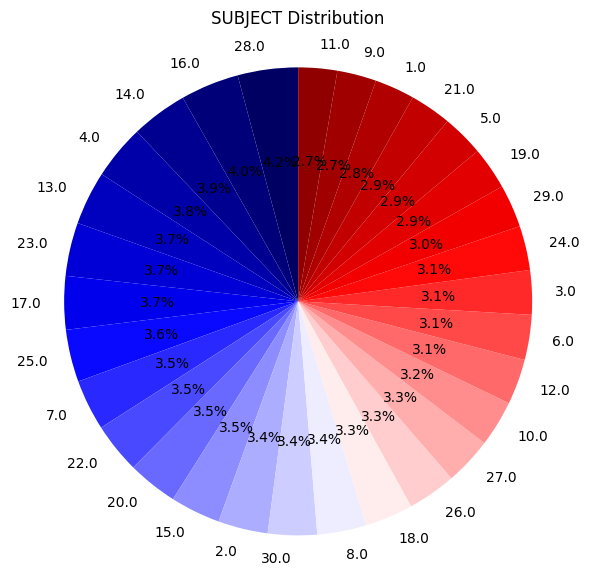

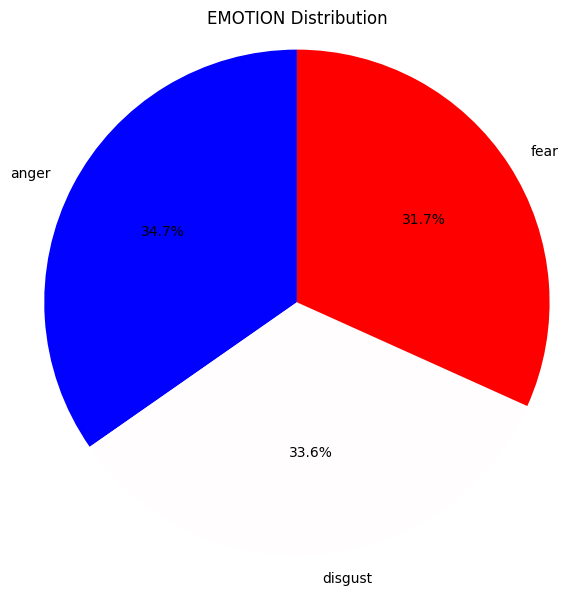

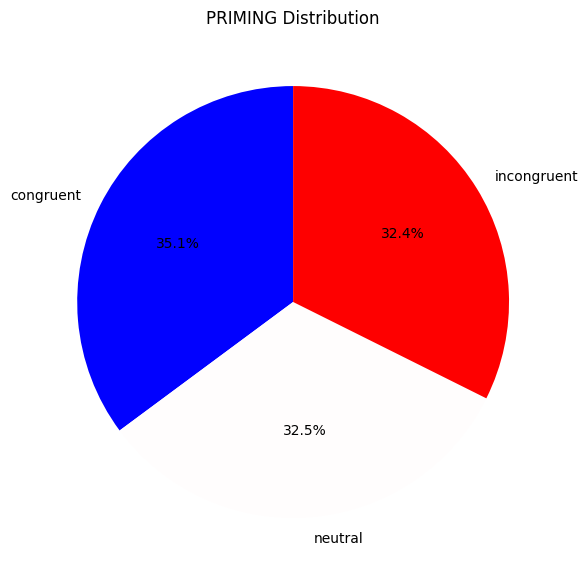

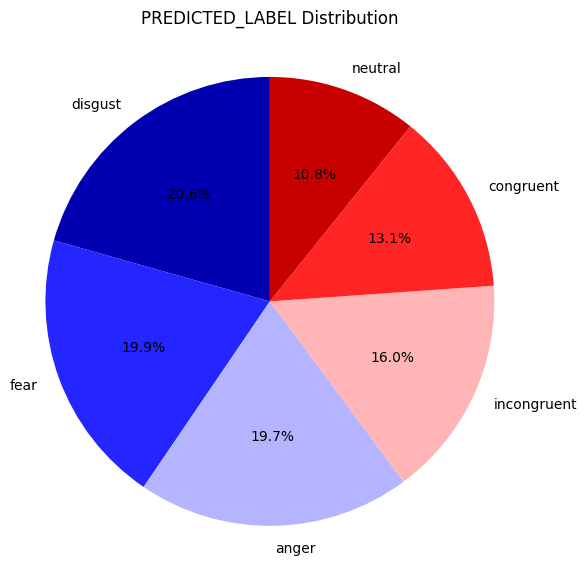

In [196]:
for lab in cat_var1: 
    # Get counts and labels
    label_counts = cat_df[lab].value_counts()
    labels = label_counts.index
    sizes = label_counts.values
    
    # Get colors
    colors = sns.color_palette('seismic', n_colors=len(labels))
    
    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=90)
    plt.title(f'{lab.upper()} Distribution')
    plt.axis('equal')  # Ensures the pie is a circle
    plt.tight_layout()
    plt.show()

<Axes: xlabel='feature_count', ylabel='test'>

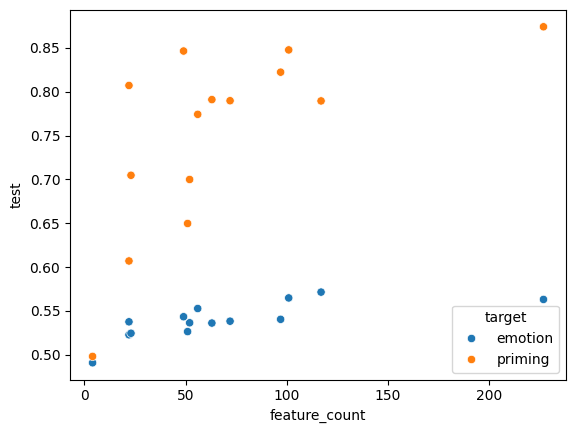

In [92]:
sns.scatterplot(data=roc_auc_scores, x="feature_count", y="test", hue="target")